In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
train = pd.read_csv('../input/training.csv')
test = pd.read_csv('../input/test.csv')

In [4]:
train.drop(axis=1, labels='Image').head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [6]:
train.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [7]:
image_size = 96 # 96x96
half_size = image_size / 2

In [8]:
def format_image(raw):
    return np.array(list(map(float, raw.split())))

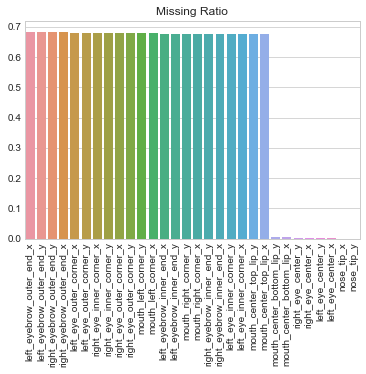

In [72]:
missing_ratio = 1 - train.drop('Image', axis=1).count()/train.shape[0]
missing_ratio = missing_ratio.sort_values(ascending=False)
missing_ratio

g = sns.barplot(x=missing_ratio.index, y=missing_ratio.values)
_ = g.set_title('Missing Ratio')
_ = g.set_xticklabels(rotation=90, labels=missing_ratio.index)

## Baseline - Single model

Start with training all points in the same model. Objective is to find a CNN architecture that works decent. Later it can be evaluated if what is best, 15 separate models predicting points (each model outputs x and y) or if is better to do 30 models (where models output x or y)

In [73]:
all_points = train.copy()
all_points.dropna(axis=0, inplace=True)
all_points.isnull().any()

left_eye_center_x            False
left_eye_center_y            False
right_eye_center_x           False
right_eye_center_y           False
left_eye_inner_corner_x      False
left_eye_inner_corner_y      False
left_eye_outer_corner_x      False
left_eye_outer_corner_y      False
right_eye_inner_corner_x     False
right_eye_inner_corner_y     False
right_eye_outer_corner_x     False
right_eye_outer_corner_y     False
left_eyebrow_inner_end_x     False
left_eyebrow_inner_end_y     False
left_eyebrow_outer_end_x     False
left_eyebrow_outer_end_y     False
right_eyebrow_inner_end_x    False
right_eyebrow_inner_end_y    False
right_eyebrow_outer_end_x    False
right_eyebrow_outer_end_y    False
nose_tip_x                   False
nose_tip_y                   False
mouth_left_corner_x          False
mouth_left_corner_y          False
mouth_right_corner_x         False
mouth_right_corner_y         False
mouth_center_top_lip_x       False
mouth_center_top_lip_y       False
mouth_center_bottom_

In [74]:
X = all_points['Image'].apply(lambda i: format_image(i)).values
X = np.concatenate(X).ravel().reshape(-1, image_size, image_size, 1)/255.
Y = (all_points.drop(labels='Image', axis=1).values - half_size)/half_size

In [75]:
def show_image(x, y_act=[], y_pred=[]):
    
    act_x = y_act[::2]
    act_y = y_act[1::2]
    
    pred_x = y_pred[::2]
    pred_y = y_pred[1::2]
    
    print(x.shape)
    
    plt.imshow(x.reshape(image_size, image_size), interpolation='nearest', cmap='Greys_r')
    plt.scatter(x=act_x, y=act_y, c='lime')
    plt.scatter(x=pred_x, y=pred_y, c='red')

(96, 96, 1)


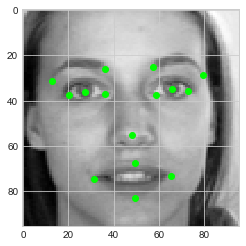

In [76]:
show_image(X[8], y_act=Y[8]*half_size+half_size)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=101)

In [79]:
X_train.shape

(1712, 96, 96, 1)

In [80]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D, Activation, Input, UpSampling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [81]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
output_shape = Y_train.shape[1]

In [82]:
# Custom loss - Mean squared error rescaled to display loss with original scale for y
def mse(y_true, y_pred):
    
    rescale_true = y_true*half_size + half_size
    rescale_pred = y_pred*half_size + half_size
    
    return K.mean(K.square(rescale_true - rescale_pred), axis=-1)

### Network

Custom network built to have decent performance. Might be good enough for the small data volumes. Might want to increase depth if I do data augmentation

In [244]:
def create_cnn(output_shape=2, reload_weights = False, custom_metrics=[]):
    model = Sequential()
    model.add(Conv2D(32,(3, 3), activation='relu', input_shape = input_shape))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Conv2D(64,(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Conv2D(128,(2,2), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(256,(2,2), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())   
    model.add(Dense(500, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(500, activation='relu'))   
    model.add(Dense(output_shape))
    
    learning_rate = 0.00001
    
    if reload_weights:
        learning_rate = 0.00001
        model.load_weights('right_eye_center_cnn.h5')
        
    sgd = keras.optimizers.SGD(lr=learning_rate, momentum = 0.9, nesterov=True)
    model.compile(loss=mse, optimizer=sgd, metrics=custom_metrics)
    
    return model

In [86]:
model = create_cnn(output_shape)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 128)       32896     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 256)         131328    
__________

In [87]:
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience=3, verbose=1, factor=0.5)

early_stopping = EarlyStopping(monitor='loss', patience=6, verbose=1)

In [88]:
epochs = 100
batch_size = 64

hist = model.fit(X_train, 
                 Y_train, 
                 validation_data=[X_val, Y_val], 
                 shuffle=True,  
                 batch_size=batch_size,
                 epochs=epochs,
                 callbacks=[learning_rate_reduction, early_stopping], 
                 verbose=1)

Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 18s 11ms/step - loss: 45.8157 - val_loss: 973132209.0467

In [90]:
Y_pred = model.predict(X_val)

In [91]:
from sklearn.metrics import mean_squared_error

In [92]:
mean_squared_error(Y_val*half_size+half_size, Y_pred*half_size+half_size)

9.734575789462383

In [106]:
rescaled_val = Y_val*half_size+half_size
rescaled_pred = Y_pred*half_size+half_size

errors = []

for i in range(rescaled_pred.shape[1]):
    errors.append(mean_squared_error(rescaled_val[:,i], rescaled_pred[:,i]))

list(zip(train.columns, map("{:.3f}".format, errors)))

[('left_eye_center_x', '3.614'),
 ('left_eye_center_y', '5.651'),
 ('right_eye_center_x', '3.911'),
 ('right_eye_center_y', '5.613'),
 ('left_eye_inner_corner_x', '3.488'),
 ('left_eye_inner_corner_y', '4.407'),
 ('left_eye_outer_corner_x', '6.106'),
 ('left_eye_outer_corner_y', '7.540'),
 ('right_eye_inner_corner_x', '3.118'),
 ('right_eye_inner_corner_y', '4.442'),
 ('right_eye_outer_corner_x', '6.808'),
 ('right_eye_outer_corner_y', '7.706'),
 ('left_eyebrow_inner_end_x', '6.673'),
 ('left_eyebrow_inner_end_y', '7.912'),
 ('left_eyebrow_outer_end_x', '9.899'),
 ('left_eyebrow_outer_end_y', '13.061'),
 ('right_eyebrow_inner_end_x', '7.177'),
 ('right_eyebrow_inner_end_y', '7.932'),
 ('right_eyebrow_outer_end_x', '10.367'),
 ('right_eyebrow_outer_end_y', '14.302'),
 ('nose_tip_x', '10.250'),
 ('nose_tip_y', '19.265'),
 ('mouth_left_corner_x', '13.090'),
 ('mouth_left_corner_y', '18.113'),
 ('mouth_right_corner_x', '12.695'),
 ('mouth_right_corner_y', '15.967'),
 ('mouth_center_top_lip

(96, 96, 1)


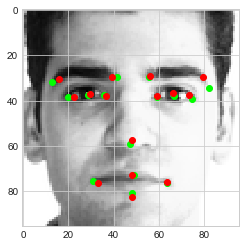

In [107]:
index = 4
show_image(X_val[index], y_act=Y_val[index]*half_size+half_size, y_pred = Y_pred[index]*half_size+half_size)

In [108]:
model.save('single_cnn.h5')

## Ensamble - One model per point

Evalutate the performance of models that learn a single point (x and y) to see if several strong individual models are the best way to go. Also to later be compared with single value models (where only one of x and y is the output)

In [156]:
train_point = train[['right_eye_center_x','right_eye_center_y','Image']].copy()
train_point.dropna(axis=0, inplace=True)
train_point.isnull().any()

right_eye_center_x    False
right_eye_center_y    False
Image                 False
dtype: bool

In [110]:
# Euclidian distance - an alternative loss and metric when working with points
def ed(y_true, y_pred):
    
    rescale_true = y_true*half_size + half_size
    rescale_pred = y_pred*half_size + half_size
    
    return K.sqrt(K.sum(K.square(rescale_true - rescale_pred), axis=-1, keepdims=True))

In [233]:
# prepare a single point for training
def prepare_training_point(train, point_index):

    x_index = point_index*2
    y_index = x_index + 1
    
    train_point = train.iloc[:,[x_index, y_index, -1]].copy()
    train_point.dropna(axis=0, inplace=True)
    train_point.isnull().any()

    X = train_point['Image'].apply(lambda i: format_image(i)).values
    X = np.concatenate(X).ravel().reshape(-1, image_size, image_size, 1)/255.
    Y = (train_point.drop(labels='Image', axis=1).values - half_size)/half_size

    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=101)
    
    return X_train, X_val, Y_train, Y_val

In [234]:
X_train, X_val, Y_train, Y_val = prepare_training_point(train, 0)

In [245]:
model = create_cnn(Y_train.shape[1], custom_metrics=[ed])

In [ ]:
epochs = 100
batch_size = 64

hist = model.fit(X_train, 
                 Y_train, 
                 validation_data=[X_val, Y_val], 
                 shuffle=True,  
                 batch_size=batch_size,
                 epochs=epochs,
                 callbacks=[learning_rate_reduction, early_stopping], 
                 verbose=1)

Train on 5631 samples, validate on 1408 samples
Epoch 1/100
5631/5631 [==============================] - 56s 10ms/step - loss: 17.7508 - ed: 4.2669 - val_loss: 14.0585 - val_ed: 4.0712

In [226]:
Y_pred = model.predict(X_val)

In [227]:
mean_squared_error(Y_val*half_size+half_size, Y_pred*half_size+half_size)

7.296192173924311

In [228]:
def mean_euclidian_distance(y_true, y_pred):
    return np.mean(np.sqrt(np.sum(np.square(y_true - y_pred), axis=-1)))

In [229]:
mean_euclidian_distance(Y_val*half_size+half_size, Y_pred*half_size+half_size)

2.4728784071202514

(96, 96, 1)


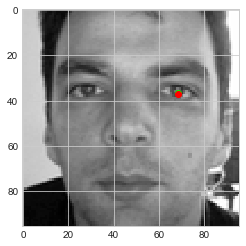

In [230]:
index = 4
show_image(X_val[index], y_act=Y_val[index]*half_size+half_size, y_pred = Y_pred[index]*half_size+half_size)

In [231]:
model.save('single_point_cnn.h5')

In [ ]:
epochs = 50
batch_size = 64

trained_models = []
mses = []
eds = []

for i in range(15):
    
    X_train, X_val, Y_train, Y_val = prepare_training_point(train, i)
    
    model = create_cnn(Y_train.shape[1])
    
    model.fit(X_train, 
                 Y_train, 
                 validation_data=[X_val, Y_val], 
                 shuffle=True,  
                 batch_size=batch_size,
                 epochs=epochs,
                 callbacks=[learning_rate_reduction, early_stopping], 
                 verbose=0)
    
    
    Y_pred = new_model.predict(X_val)
    
    mses.append(mean_squared_error(Y_val*half_size+half_size, Y_pred*half_size+half_size))
    eds.append(mean_euclidian_distance(Y_val*half_size+half_size, Y_pred*half_size+half_size))
    trained_models.append(model)
    
    print('Finished point: ', 
          i,
          ' with loss: ', 
          mean_squared_error(Y_val*half_size+half_size, Y_pred*half_size+half_size),
          ' with ed: ', 
          mean_euclidian_distance(Y_val*half_size+half_size, Y_pred*half_size+half_size)
         )  


Epoch 00032: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 00046: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
Finished point:  0  with loss:  660.5454955802021  with ed:  36.17071886014267


C:\Users\Administrator\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\keras\callbacks.py:953: RuntimeWarning: invalid value encountered in less
  self.monitor_op = lambda a, b: np.less(a, b - self.min_delta)
C:\Users\Administrator\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\keras\callbacks.py:529: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):



Epoch 00003: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
